In [1]:
import time
from contextlib import contextmanager

from logzero import logger

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print(f'[{name}] done in {time.time() - t0:.0f} s')

"""
def load_data():
    data = pd.read_csv("../input/column_2C_weka.csv")
    data_2c_weka = data.drop("class", axis=1)
    return data_2c_weka
"""
;

''

[load data] done in 0 s
   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  
[data_2c_weka EDA] done in 0 s
Principle components:  [[  3.23645647e-01   1.13192291e-01   3.03674740e-01   2.10453357e-01
   -2.99598300e-02   8.63153779e-01]
 [ -4.76634849e-01  -9.85632787e-02  -5.32783979e-01  -3.7

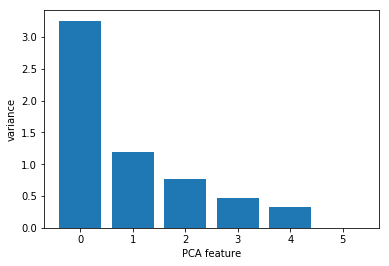

[PCA variance] done in 0 s


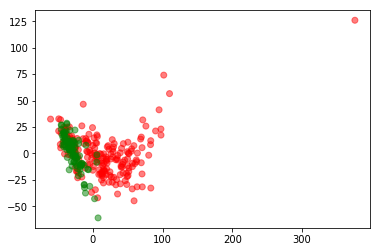

[apply PCA] done in 0 s


In [3]:
with timer("load data"):
    data = pd.read_csv("../input/column_2C_weka.csv")
    data_2c_weka = data.drop("class", axis=1)

with timer("data_2c_weka EDA"):
    print(data_2c_weka.head())

with timer("PCA"):
    model = PCA()
    model.fit_transform(data_2c_weka)
    print("Principle components: ", model.components_)

with timer("PCA variance"):
    scaler = StandardScaler()
    pca = PCA()
    pipline = make_pipeline(scaler, pca)
    pipline.fit(data_2c_weka)

    plt.bar(range(pca.n_components_), pca.explained_variance_)
    plt.xlabel('PCA feature')
    plt.ylabel('variance')
    plt.show()
    
with timer("apply PCA"):
    pca = PCA(n_components=2)
    transformed = pca.fit_transform(data_2c_weka)
    x = transformed[:, 0]
    y = transformed[:, 1]
    color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
    plt.scatter(x, y, c=color_list, alpha=0.5)
    plt.show()

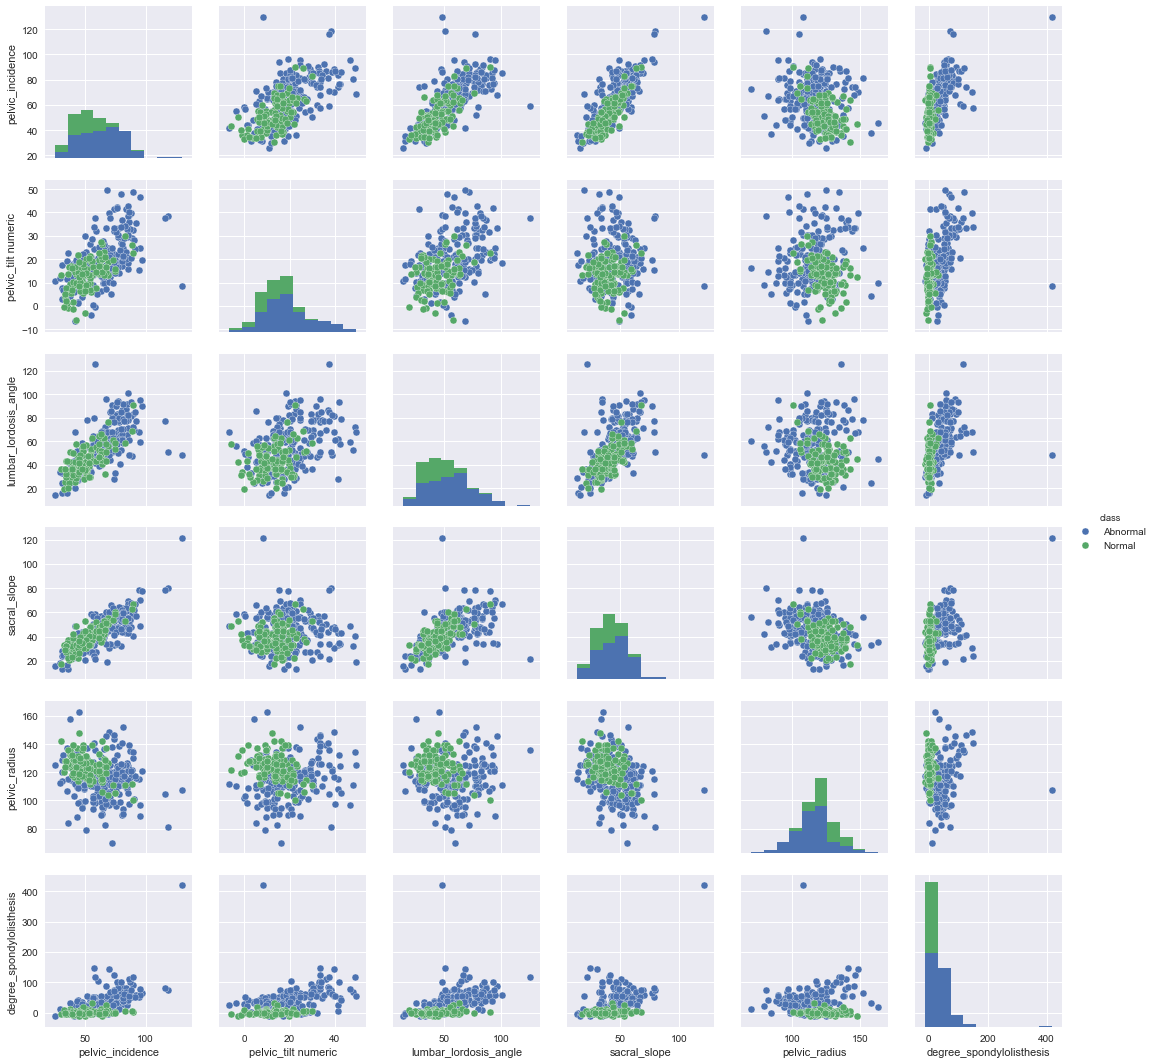

In [4]:
import seaborn as sns


sns.pairplot(data, hue="class")

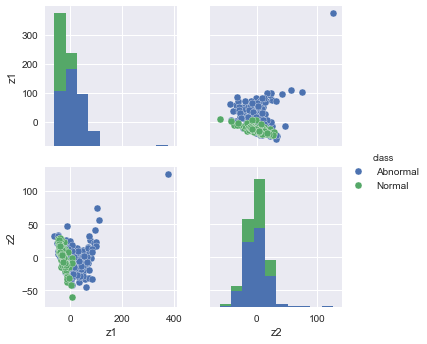

In [5]:
_res = pd.DataFrame(transformed, columns=["z1", "z2"])
_res["class"] = data["class"]
sns.pairplot(_res, hue="class")

In [6]:
from sklearn.preprocessing import StandardScaler

x_names =  data.columns.drop("class")

sc = StandardScaler()
_data = sc.fit_transform(data.drop("class", axis=1))
_data = pd.DataFrame(_data, columns=x_names)
_data["class"] = data["class"]
_data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,Abnormal
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,Abnormal
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,Abnormal
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,Abnormal
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,Abnormal


[plot swamplot] done in 19 s


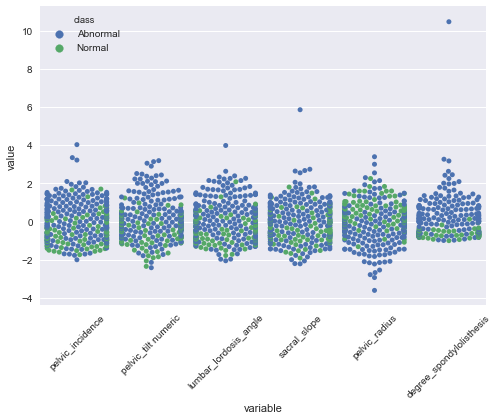

In [7]:
with timer("plot swamplot"):
    _res = pd.melt(_data, id_vars="class")
    _plot = sns.swarmplot(data=_res, x="variable", y="value", hue="class")
    _plot.set_xticklabels(_plot.get_xticklabels(), rotation=45)
    

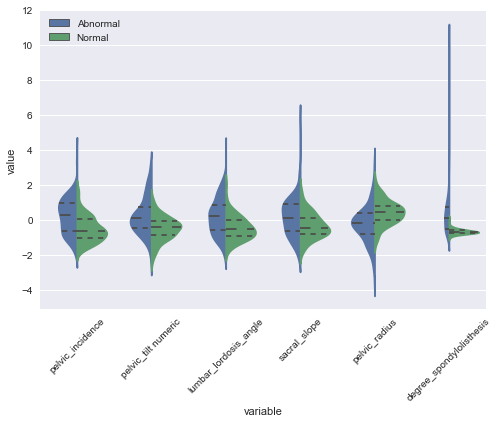

[violin plot] done in 1 s


In [8]:
with timer("violin plot"):
    _res = pd.melt(_data, id_vars="class")
    sns.violinplot(data=_res, x="variable", y="value", hue="class", split=True, inner="quart")
    plt.xticks(rotation=45)
    plt.legend(loc="upper left")
    plt.show()